<a href="https://colab.research.google.com/github/Highashikata/Data-Analytics----Analyzing-Olympic-Data/blob/main/Data_Analytics_Analyzing_120_years_of_Olympic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Data Analytics : Analyzing 120 Years of Olympic History Data with Python** 

#### **Context:**

This is a historical dataset of the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016.

**Note** that the Winter and Summer Games were held in the same year up until 1992. After that, they staggered them such that Winter Games occur on a four year cycle starting with 1994, then Summer in 1996, then Winter in 1998, and so on. A common mistake people make when analyzing this data is to assume that the Summer and Winter Games have always been staggered.

#### **Content :**

The Dataset was taken from Kaggle Website, and it is composed of 2 csv files, athlete_events.csv that contains 217,116 Rows & 15 Columns.And each column corresponds to an individual athlete competing in an individual Olympic event.

And for the second CSV file, nocregions.csv contains the data related to regions and localisation (country name and so on).


In [ ]:
### Importing the essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Increase the size of seaborn plots
sns.set(rc = {'figure.figsize': (8, 8)})

### **Step 1 : Loading the Data**

In [ ]:
### Loading the Data to Google Colab
from google.colab import files
uploaded = files.upload()

Saving athletes_events.csv to athletes_events.csv
Saving noc_regions.csv to noc_regions.csv


In [ ]:
athletes_raw_data = pd.read_csv("athletes_events.csv")
regions_raw_data = pd.read_csv("noc_regions.csv")


In [ ]:
# Checking for the Impotation of the Data 
display(athletes_raw_data.head(), athletes_raw_data.tail(), 'The Shape of the Atheletes DataSet is {}'.format(athletes_raw_data.shape))

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


'The Shape of the Atheletes DataSet is (271116, 15)'

In [ ]:
# Checking for the Data Importation 
display(regions_raw_data.head(), regions_raw_data.tail(), 'The Shape of the Atheletes DataSet is {}'.format(regions_raw_data.shape))

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


,NOC,region,notes
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN
229,ZIM,Zimbabwe,NaN


'The Shape of the Atheletes DataSet is (230, 3)'

In [ ]:
# Merging the The 2 datasets
merged_data = athletes_raw_data.merge(regions_raw_data, how = 'left', on = 'NOC')

In [ ]:
# Checking for the merged data
merged_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [ ]:
# Manipulating the Data
df = merged_data.copy()

In [ ]:
df.shape

(271116, 17)

In [ ]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

In [ ]:
df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
region     object
notes      object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [ ]:
df.describe().drop('ID', axis = 1)

,Age,Height,Weight,Year
count,261642.000000,210945.000000,208241.000000,271116.000000
mean,25.556898,175.338970,70.702393,1978.378480
std,6.393561,10.518462,14.348020,29.877632
min,10.000000,127.000000,25.000000,1896.000000
25%,21.000000,168.000000,60.000000,1960.000000
50%,24.000000,175.000000,70.000000,1988.000000
75%,28.000000,183.000000,79.000000,2002.000000
max,97.000000,226.000000,214.000000,2016.000000


The Tableau above, shows us that there's some mistakes in the Age column, because we can't have participants with the following ages LoL (10 and 97). So the data neads to be cleaned

In [ ]:
# Changing the Columns name to have all the col name with Capital letters at the beginning
df.rename(columns = {"region": "Region", "notes": "Notes"}, inplace = True)

In [ ]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Region', 'Notes'],
      dtype='object')

In [ ]:
# Displaying the Unique Values of each columns
for column in df:
  if len(df[column].unique()) < 10:
    print('The Number of Values for the Feature {} : {} ---- {}'.format(column, df[column].unique(), len(df[column].unique())))
  else:
    print('The Number of values for the Feature {} : {}'.format(column, len(df[column].unique())))


The Number of values for the Feature ID : 135571
The Number of values for the Feature Name : 134732
The Number of Values for the Feature Sex : ['M' 'F'] ---- 2
The Number of values for the Feature Age : 75
The Number of values for the Feature Height : 96
The Number of values for the Feature Weight : 221
The Number of values for the Feature Team : 1184
The Number of values for the Feature NOC : 230
The Number of values for the Feature Games : 51
The Number of values for the Feature Year : 35
The Number of Values for the Feature Season : ['Summer' 'Winter'] ---- 2
The Number of values for the Feature City : 42
The Number of values for the Feature Sport : 66
The Number of values for the Feature Event : 765
The Number of Values for the Feature Medal : [nan 'Gold' 'Bronze' 'Silver'] ---- 4
The Number of values for the Feature Region : 206
The Number of values for the Feature Notes : 22


In [ ]:
# Displaying the Kurtosis and the Skewness of the Data
display("The Kurtosis of the DataSet is {}".format(df.kurtosis()))

display("The Skewness of the DataSet is {}".format(df.skew()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


'The Kurtosis of the DataSet is ID       -1.197292\nAge       6.270642\nHeight    0.177728\nWeight    2.017523\nYear     -0.206948\ndtype: float64'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


'The Skewness of the DataSet is ID       -0.004681\nAge       1.747123\nHeight    0.018477\nWeight    0.797169\nYear     -0.817736\ndtype: float64'

In [ ]:
### Checking for the DataSet shape before removing the Data
print("The Shape of the Data Before removing duplicate rows is {}".format(df.shape))

### The Code to remove the duplicate rows
duplicate_rows_df = df[df.duplicated()]

### Displaying the Duplicate rows DataFrame
display("The Shape of the Duplicate Rows DataFrame is {}".format(duplicate_rows_df.shape))

The Shape of the Data Before removing duplicate rows is (271116, 17)


'The Shape of the Duplicate Rows DataFrame is (1385, 17)'

##### Checking for missing values

In [ ]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

##### Viz Missing Data

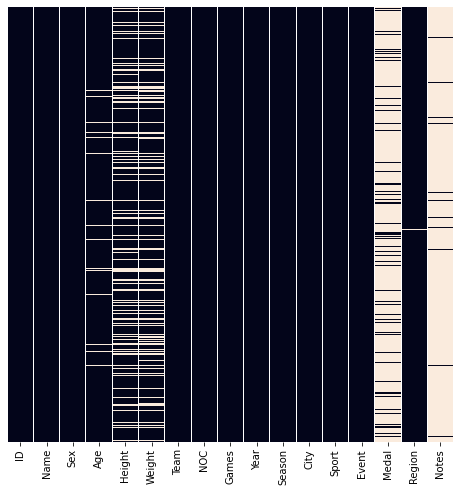

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df.isnull(), cbar = False, yticklabels = False, vmin=0.5, vmax=0.7, ax = ax)

In [ ]:
# Viz the Missing Rows based on the Individual Status
df[df['Medal'].isnull()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


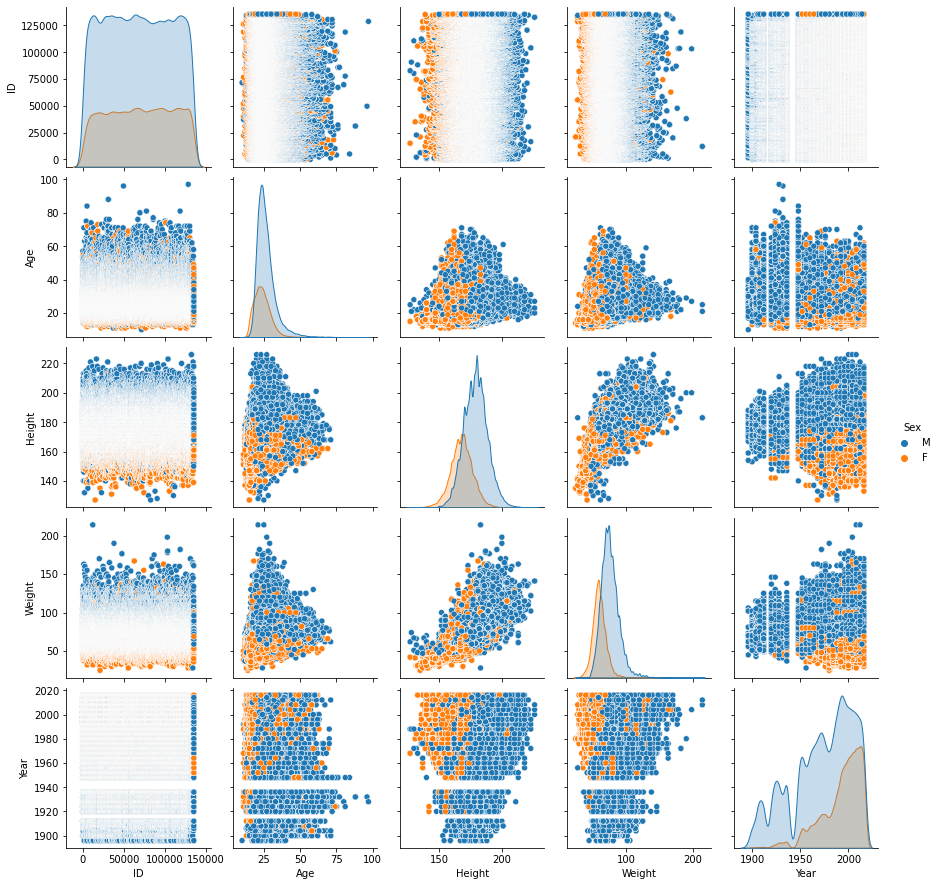

In [ ]:
sns.pairplot(df, hue = 'Sex')

In [ ]:
# sns.pairplot(df.drop('ID', axis = 1), hue = 'Sex')